In [42]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder


In [43]:
df = pd.read_csv("cardio_train.csv", sep = ";")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


(70000, 13)

In [44]:
df = pd.read_csv("cardio_train_clean.csv", sep = ",")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68562 entries, 0 to 68561
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68562 non-null  int64  
 1   age          68562 non-null  int64  
 2   gender       68562 non-null  int64  
 3   height       68562 non-null  int64  
 4   weight       68562 non-null  float64
 5   ap_hi        68562 non-null  int64  
 6   ap_lo        68562 non-null  int64  
 7   cholesterol  68562 non-null  int64  
 8   gluc         68562 non-null  int64  
 9   smoke        68562 non-null  int64  
 10  alco         68562 non-null  int64  
 11  active       68562 non-null  int64  
 12  cardio       68562 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


(68562, 13)

In [45]:
df["age_year"] = df["age"] / 365
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68562 entries, 0 to 68561
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68562 non-null  int64  
 1   age          68562 non-null  int64  
 2   gender       68562 non-null  int64  
 3   height       68562 non-null  int64  
 4   weight       68562 non-null  float64
 5   ap_hi        68562 non-null  int64  
 6   ap_lo        68562 non-null  int64  
 7   cholesterol  68562 non-null  int64  
 8   gluc         68562 non-null  int64  
 9   smoke        68562 non-null  int64  
 10  alco         68562 non-null  int64  
 11  active       68562 non-null  int64  
 12  cardio       68562 non-null  int64  
 13  age_year     68562 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.3 MB


In [46]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000
mean,49971.092427,19464.169890,1.349042,164.471150,74.143089,126.625959,81.364954,1.364969,1.225898,0.088125,0.053616,0.803433,0.494939,53.326493
std,28849.066833,2467.602571,0.476671,7.797999,14.255469,16.738005,9.550331,0.679182,0.571863,0.283478,0.225259,0.397405,0.499978,6.760555
min,0.000000,10798.000000,1.000000,140.000000,40.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562
25%,25000.500000,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.378082
50%,50016.500000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.972603
75%,74861.750000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.419178
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123


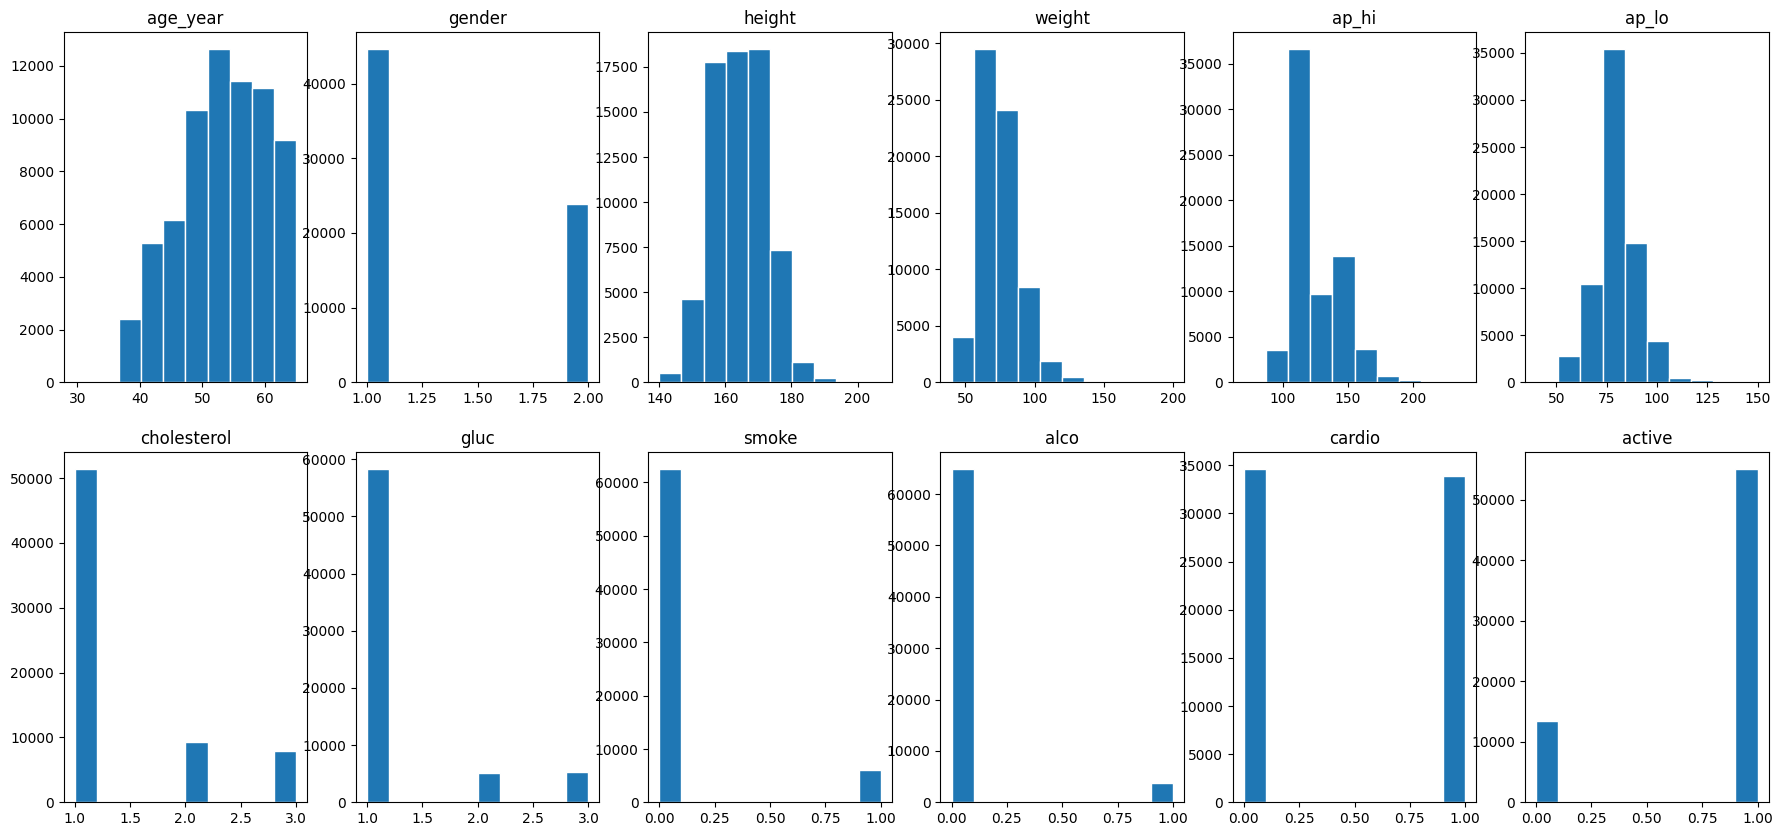

In [47]:

plt.figure(figsize=(22, 10))

cols = ['age_year', 'gender','height','weight','ap_hi', 'ap_lo', 'cholesterol','gluc', 'smoke', 'alco', 'cardio', 'active']
for i, col in enumerate(cols, 1):
    plt.subplot(2, 6, i)  
    plt.hist(df[col], bins=10, edgecolor='white')
    plt.title(col)

plt.show()

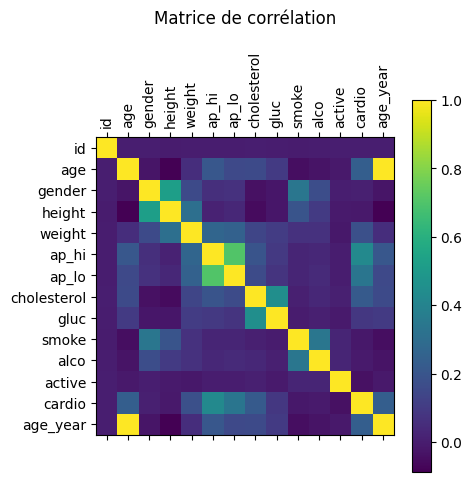

In [48]:
corr = df.corr(numeric_only=True)

plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Matrice de corrélation", pad=20)
plt.show()

np.float64(0.4257248218709485)

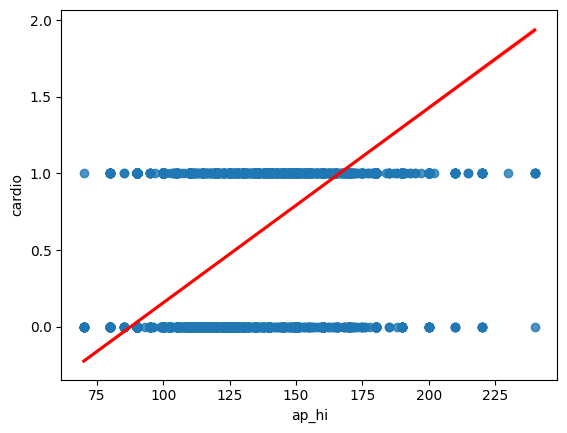

In [49]:
sns.regplot(x=df['ap_hi'], y=df['cardio'], line_kws={"color": "red"} )
df['ap_hi'].corr(df['cardio'])

np.float64(0.33741852644491266)

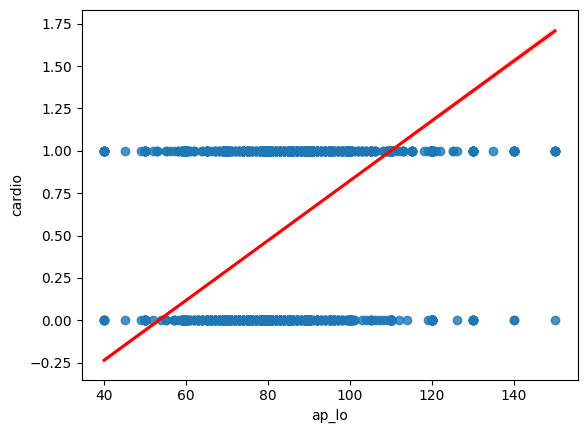

In [50]:
sns.regplot(x=df['ap_lo'], y=df['cardio'], line_kws={"color": "red"} )
df['ap_lo'].corr(df['cardio'])

np.float64(0.23955819420950164)

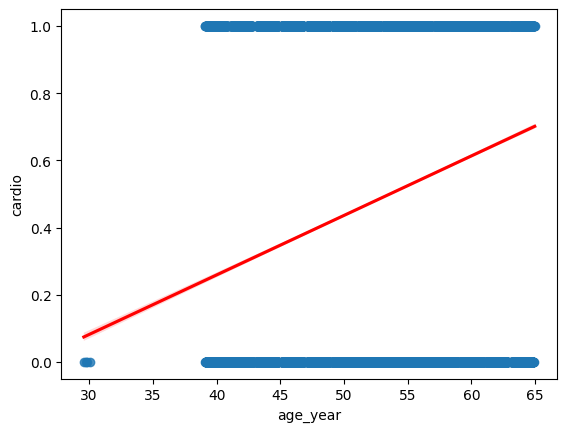

In [51]:
sns.regplot(x=df['age_year'], y=df['cardio'], line_kws={"color": "red"} )
df['age_year'].corr(df['cardio'])

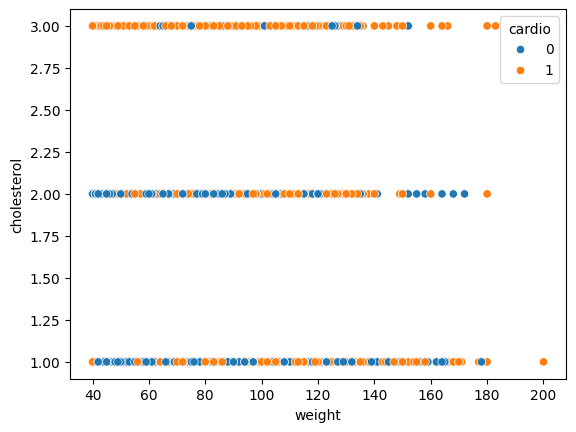

In [52]:
sns.scatterplot(data=df, x='weight', y='cholesterol', hue='cardio')
plt.show()

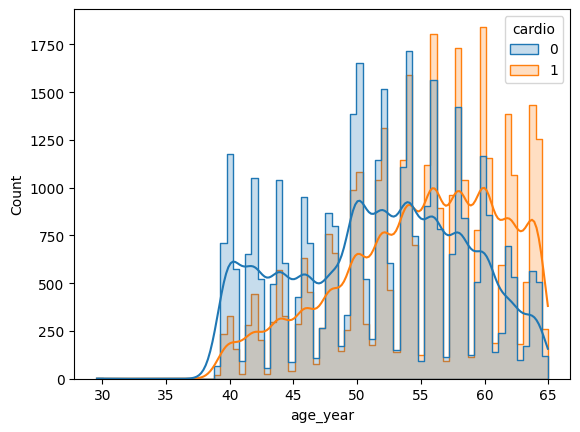

In [53]:
sns.histplot(data=df, x='age_year', hue='cardio', kde=True, element='step', stat='count', common_norm=False)
plt.show()


<Axes: xlabel='age_year', ylabel='Count'>

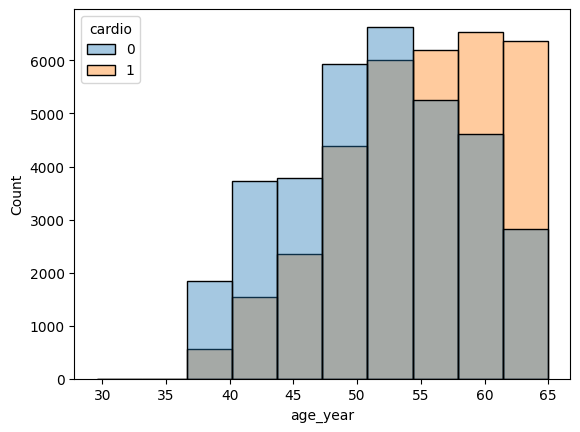

In [54]:
sns.histplot(
    data=df,
    x='age_year',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)

<Axes: xlabel='weight', ylabel='Count'>

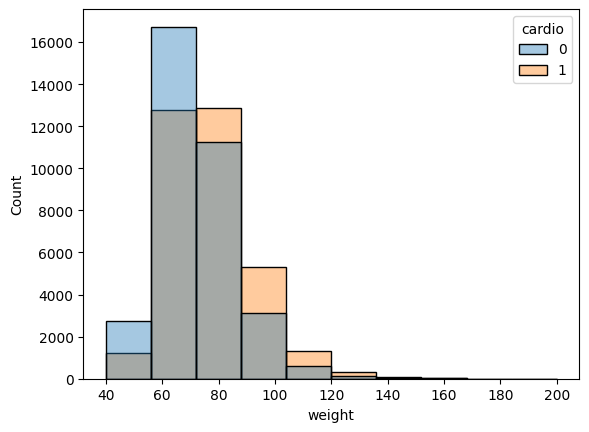

In [55]:
sns.histplot(
    data=df,
    x='weight',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)

<Axes: xlabel='ap_lo', ylabel='Count'>

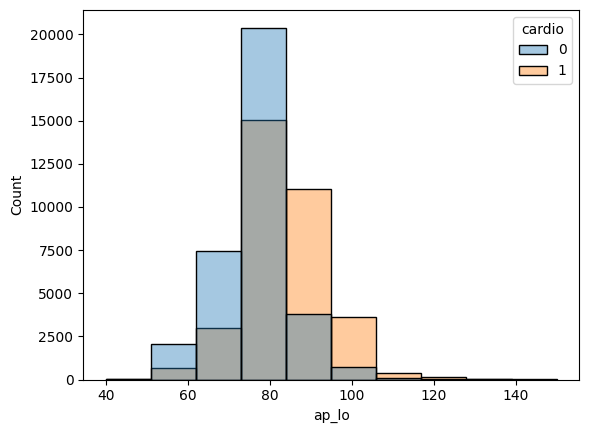

In [56]:
sns.histplot(
    data=df,
    x='ap_lo',
    hue='cardio',
    bins=10,
    multiple='layer',  
    alpha=0.4,        
    stat='count'        
)

<Axes: xlabel='ap_hi', ylabel='Count'>

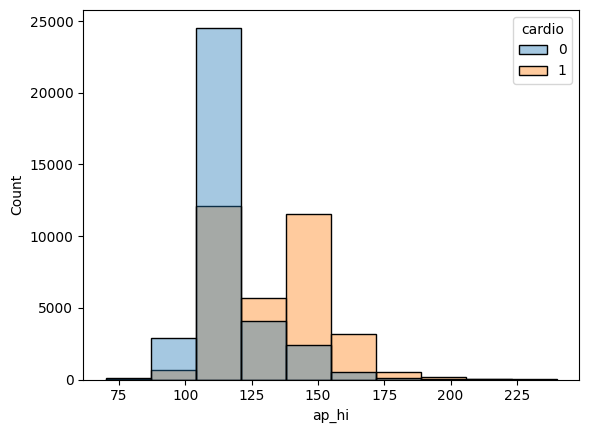

In [57]:
sns.histplot(
    data=df,
    x='ap_hi',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)

<Axes: xlabel='cholesterol', ylabel='Count'>

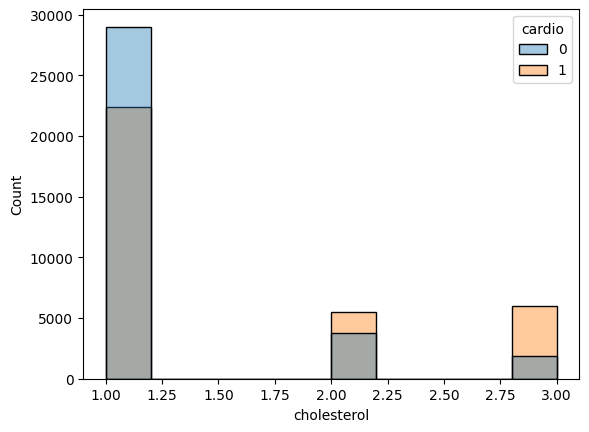

In [58]:
sns.histplot(
    data=df,
    x='cholesterol',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)

In [59]:
sns.histplot(
    data=df,
    x='',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)

ValueError: Could not interpret value `` for `x`. An entry with this name does not appear in `data`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
X = df[["age_year", "gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active"]] 
y = df["cardio"] 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification:\n", classification_report(y_test, y_pred))


Accuracy: 0.7301101144899
Matrice de confusion:
 [[5449 1500]
 [2201 4563]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      6949
           1       0.75      0.67      0.71      6764

    accuracy                           0.73     13713
   macro avg       0.73      0.73      0.73     13713
weighted avg       0.73      0.73      0.73     13713



In [ ]:


# Modèle avec hyperparamètres modifiés
model = LogisticRegression(
    C=0.5,                  # pénalise un peu plus (par défaut c’est 1.0)
    penalty='l2',           # régularisation L2
    solver='saga',         # optimiseur recommandé pour les petits jeux de données
    max_iter=1000,
    class_weight='balanced'  # utile si la classe 1 est très minoritaire
)

model.fit(X_train, y_train)


/Users/sulivanmoreau/La_plateforme/cardio-vasc-risks/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000, solver='saga')

In [ ]:
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification:\n", classification_report(y_test, y_pred))


Accuracy: 0.7238386932108218
Matrice de confusion:
 [[5334 1615]
 [2172 4592]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      6949
           1       0.74      0.68      0.71      6764

    accuracy                           0.72     13713
   macro avg       0.73      0.72      0.72     13713
weighted avg       0.73      0.72      0.72     13713

